In [1]:
# =============================
# ⚡ ENERGY ANALYTICS PROJECT — AFRICA
# =============================

# --- 1️⃣ Import Libraries ---
!pip install wbdata
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import wbdata
import datetime
import statsmodels.api as sm
import os

# Set Seaborn theme
sns.set_theme(style="whitegrid")



In [2]:
# --- 2️⃣ Define Parameters ---
# Six countries (balanced regional representation)
countries = ['KE', 'NG', 'EG', 'ZA', 'GH', 'ET']

# World Bank indicators
indicators = {
    'EG.USE.PCAP.KG.OE': 'Energy_use_kg_per_capita',
    'NY.GDP.PCAP.CD': 'GDP_per_capita_USD'
}

# Time period
start = datetime.datetime(2000, 1, 1)
end = datetime.datetime(2023, 12, 31)

In [3]:
# --- 3️⃣ Fetch Data ---
print("Fetching data from World Bank API...")
try:
    df = wbdata.get_dataframe(indicators, country=countries, date=(start, end))
    df.reset_index(inplace=True)
    df.rename(columns={'country': 'Country', 'date': 'Year'}, inplace=True)
    df['Year'] = df['Year'].astype(int)
    print("✅ Data successfully loaded!")
except Exception as e:
    print("⚠️ Could not fetch data from API. Error:", e)
    df = None

Fetching data from World Bank API...
✅ Data successfully loaded!


In [4]:
# --- 4️⃣ Quick Data Preview ---
if df is not None:
    print(df.head())
    print("\nMissing values summary:\n", df.isnull().sum())

            Country  Year  Energy_use_kg_per_capita  GDP_per_capita_USD
0  Egypt, Arab Rep.  2023                928.394947         3456.789685
1  Egypt, Arab Rep.  2022                902.488430         4233.307837
2  Egypt, Arab Rep.  2021                857.821938         3827.354154
3  Egypt, Arab Rep.  2020                805.259457         3511.113810
4  Egypt, Arab Rep.  2019                844.783013         2962.988920

Missing values summary:
 Country                     0
Year                        0
Energy_use_kg_per_capita    3
GDP_per_capita_USD          1
dtype: int64


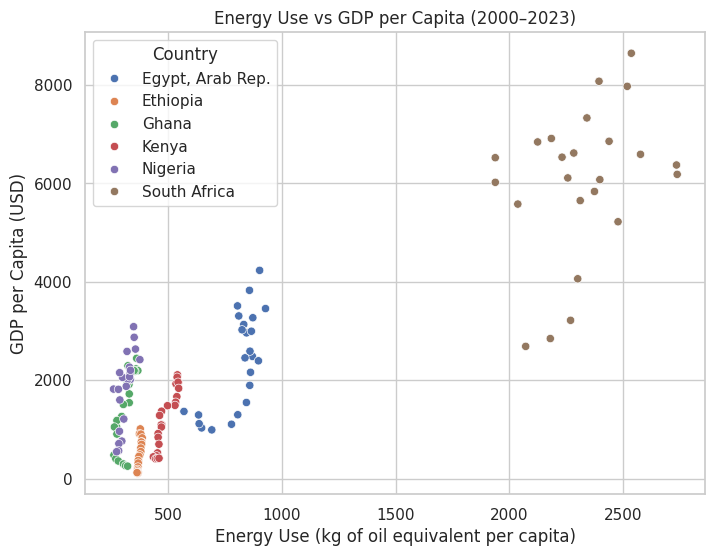

In [5]:

# --- 5️⃣ Visualization ---
if df is not None:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=df, x="Energy_use_kg_per_capita", y="GDP_per_capita_USD", hue="Country")
    plt.title("Energy Use vs GDP per Capita (2000–2023)")
    plt.xlabel("Energy Use (kg of oil equivalent per capita)")
    plt.ylabel("GDP per Capita (USD)")
    plt.show()

The scatter plot visualizes the relationship between energy use per capita and GDP per capita for the selected African countries between 2000 and 2023. Each point represents a country-year observation. The different colors indicate the different countries, allowing for a visual comparison of their energy use and economic development over time.

Generally, you might expect to see a positive correlation, meaning as GDP per capita increases, so does energy use per capita. This can be seen for some countries in the plot, where the points tend to move upwards and to the right over time. However, the plot also shows variations between countries and within countries over time, reflecting different development paths and energy policies.

In [6]:
# --- 6️⃣ Bivariate Correlation ---
if df is not None:
    corr = df[['Energy_use_kg_per_capita', 'GDP_per_capita_USD']].corr().iloc[0, 1]
    print(f"🔹 Correlation between energy use and GDP per capita: {corr:.2f}")

🔹 Correlation between energy use and GDP per capita: 0.88


The correlation coefficient of 0.88 suggests a strong positive linear relationship between energy use per capita and GDP per capita for these countries between 2000 and 2023. This means that as GDP per capita tends to increase, energy use per capita also tends to increase. However, it's important to remember that correlation does not imply causation. Other factors could be influencing both energy use and GDP.

In [7]:
# --- 7️⃣ OLS Regression ---
if df is not None:
    clean_df = df.dropna(subset=['Energy_use_kg_per_capita', 'GDP_per_capita_USD'])
    X = sm.add_constant(clean_df['Energy_use_kg_per_capita'])
    y = clean_df['GDP_per_capita_USD']

    model = sm.OLS(y, X).fit()
    print(model.summary())

                            OLS Regression Results                            
Dep. Variable:     GDP_per_capita_USD   R-squared:                       0.783
Model:                            OLS   Adj. R-squared:                  0.782
Method:                 Least Squares   F-statistic:                     501.9
Date:                Mon, 03 Nov 2025   Prob (F-statistic):           5.63e-48
Time:                        15:46:14   Log-Likelihood:                -1165.6
No. Observations:                 141   AIC:                             2335.
Df Residuals:                     139   BIC:                             2341.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

The OLS regression results show a strong positive relationship between Energy Use per Capita and GDP per Capita. The R-squared value of 0.783 indicates that approximately 78.3% of the variance in GDP per Capita can be explained by the variation in Energy Use per Capita. The coefficient for Energy_use_kg_per_capita is 2.4683, which is statistically significant (P>|t| is 0.000), suggesting that for every one-unit increase in energy use per capita (kg of oil equivalent), GDP per capita is estimated to increase by approximately 2.47 USD, holding other factors constant. The constant term (319.2886) represents the estimated GDP per capita when energy use per capita is zero, although this might not have a practical interpretation in this context. The condition number is large, suggesting potential multicollinearity, which means that there might be other variables correlated with energy use that are also influencing GDP.